## **Module 5.2: Supervised Learning – Regression Algorithms**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Load the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Create DataFrame and Target Series
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal") # Target is median house value in $100,000s

# --- Initial Data Prep ---
# For consistency, let's do a train-test split once at the beginning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will also scale our data, as it's crucial for many regression models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Import common metrics
from sklearn.metrics import mean_squared_error, r2_score

# A helper function to evaluate and store model results
results = {}
def evaluate_model(name, model, X_test_data=X_test_scaled):
    predictions = model.predict(X_test_data)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"--- {name} ---")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

print("Setup Complete. Data is loaded, split, and scaled.")
display(X_train.head())

Setup Complete. Data is loaded, split, and scaled.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


# Topic 1: Linear Regression

Linear Regression is the simplest regression model. It finds the best-fitting straight line (or hyperplane in higher dimensions) through the data.

### Model Equation:
\[
y = b0 + b1x1 + b2x2 + ....... + bnxn
\]

- **b₀ (Intercept):** The value of y when all x values are 0.
- **b₁...bₙ (Coefficients):** The weights applied to each corresponding feature x₁ through xₙ.

---

## A. Implementation

> The implementation of linear regression typically involves using libraries such as `scikit-learn`.  
> You define your features `X` and target `y`, then fit a linear model to the data.


In [2]:
from sklearn.linear_model import LinearRegression

# 1. Initialize the model
lin_reg = LinearRegression()

# 2. Train the model on scaled data
lin_reg.fit(X_train_scaled, y_train)

# 3. Evaluate
evaluate_model("Linear Regression", lin_reg)

# 4. Interpreting Coefficients
# A coefficient tells you how much the target 'y' is expected to increase
# for a one-unit increase in that feature, holding all other features constant.
# Note: This interpretation is valid for *scaled* data.
coeffs = pd.DataFrame(lin_reg.coef_, index=X.columns, columns=['Coefficient'])
print("--- Linear Regression Coefficients ---")
display(coeffs.sort_values('Coefficient', ascending=False))

--- Linear Regression ---
Mean Squared Error: 0.5559
R-squared: 0.5758

--- Linear Regression Coefficients ---


,Coefficient
MedInc,0.854383
AveBedrms,0.339259
HouseAge,0.122546
Population,-0.002308
AveOccup,-0.040829
AveRooms,-0.294410
Longitude,-0.869842
Latitude,-0.896929


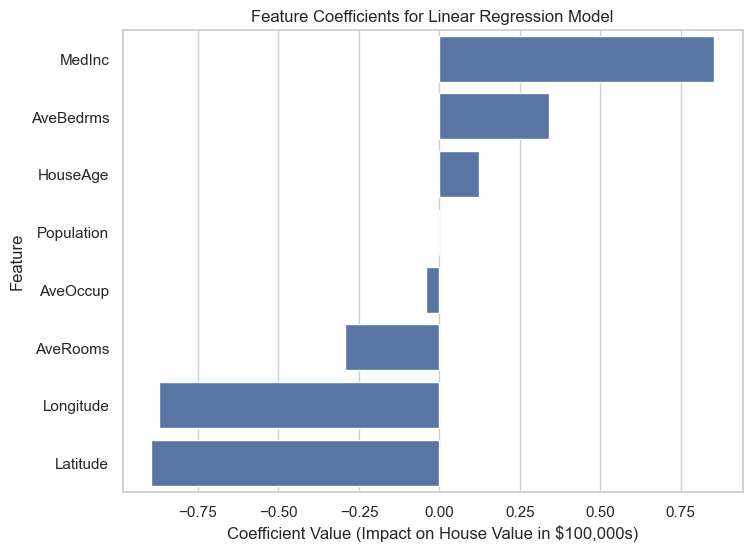

In [3]:
# Sort the coefficients for a more organized plot
coeffs_sorted = coeffs.sort_values('Coefficient', ascending=False)

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x=coeffs_sorted['Coefficient'], y=coeffs_sorted.index)

# Add labels and a title for clarity
plt.title('Feature Coefficients for Linear Regression Model')
plt.xlabel('Coefficient Value (Impact on House Value in $100,000s)')
plt.ylabel('Feature')

# Display the plot
plt.show()

## B. Key Concepts & Assumptions

### 📌 Cost Function (MSE)
Linear Regression "learns" by finding the coefficients that **minimize the Mean Squared Error (MSE)** between the predicted values and the actual values.

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\]

---

### 📉 Gradient Descent (Conceptual)
An optimization algorithm used to find this minimum.  
**Analogy:** Imagine standing on a mountain and taking small steps downhill until you reach the lowest point (the minimum MSE).

---

### 📊 R-squared (R²)
A metric between **0 and 1** that represents the **proportion of the variance** in the dependent variable that is predictable from the independent variables.

> Example: An R² of 0.72 means that **72% of the variability in house prices** can be explained by our features.

---

### ⚠️ Assumptions (CRITICAL for "Amaze Factor")

1. **Linearity**  
   The relationship between features and the target is linear.

2. **Independence**  
   Observations are independent of each other.

3. **Homoscedasticity**  
   The **variance of the errors (residuals)** is constant across all levels of the features.  
   _Check with:_ Residuals vs. Predicted Values Plot.

4. **Normality of Residuals**  
   The errors (residuals) are normally distributed.  
   _Check with:_ Histogram or Q-Q Plot.


## C. Checking Assumptions

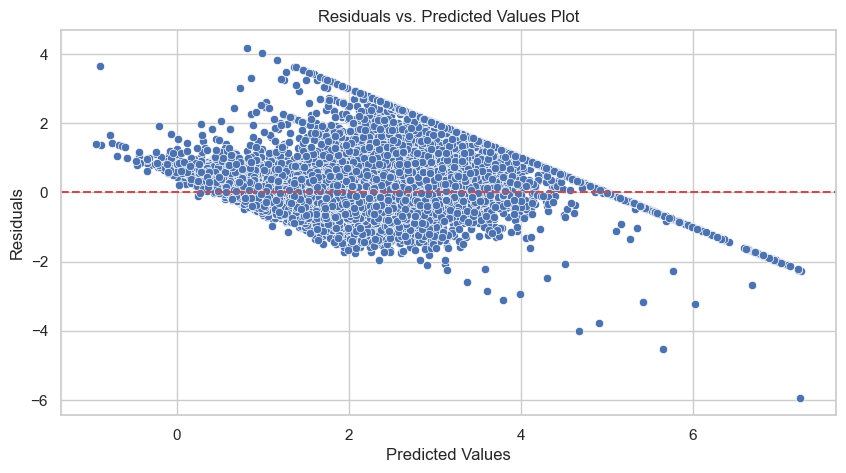

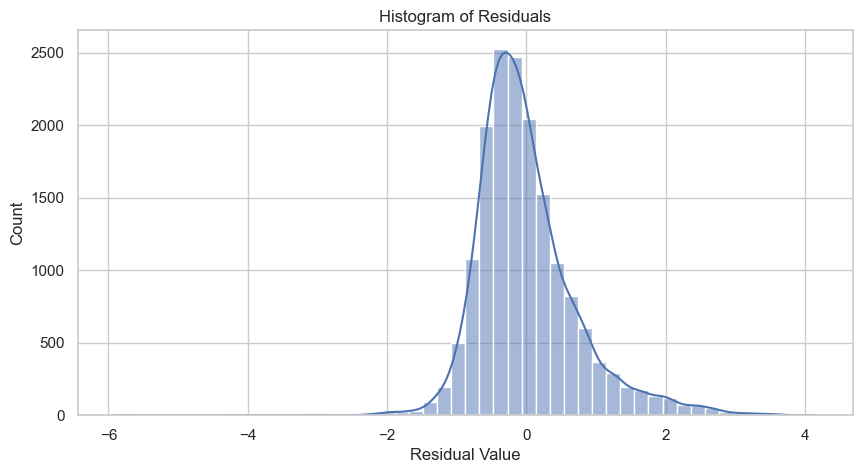

In [4]:
# Calculate residuals
predictions = lin_reg.predict(X_train_scaled)
residuals = y_train - predictions

# 1. Homoscedasticity Check (Residuals vs. Predicted)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
# Ideal: A random cloud of points with no discernible pattern.
# Our plot shows a bit of a cone shape (heteroscedasticity), which is a violation.

# 2. Normality of Residuals Check (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.show()
# Ideal: A symmetric bell curve. Ours looks reasonably normal.

# Topic 2: Regularization (Ridge, Lasso, ElasticNet)

Regularization techniques are used to **prevent overfitting** in linear models by **penalizing large coefficients**. They add a regularization term to the cost function, which discourages the model from fitting the noise in the training data.

---

### 🔹 Ridge Regression (L2 Regularization)
- Adds a penalty equal to the **square of the magnitude of coefficients**.
- **Effect:** Shrinks large coefficients but **does not make them exactly zero**.
- **Use Case:** Good general-purpose regularizer when all features are useful but need to be controlled.

\[
\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} w_j^2
\]

---

### 🔸 Lasso Regression (L1 Regularization)
- Adds a penalty equal to the **absolute value of the magnitude of coefficients**.
- **Effect:** Can shrink some coefficients **exactly to zero**, effectively performing **feature selection**.
- **Use Case:** Useful when you expect many features to be irrelevant.

\[
\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} |w_j|
\]

---

### 🧪 ElasticNet
- A **combination of Ridge and Lasso** regularization.
- **Effect:** Balances between shrinking coefficients and feature selection.
- **Use Case:** Effective when there are **multiple correlated features**.

\[
\text{Loss} = \text{MSE} + \alpha_1 \sum_{j=1}^{n} |w_j| + \alpha_2 \sum_{j=1}^{n} w_j^2
\]

---

### 🎛️ Alpha (α) — The Regularization Strength
- Controls how much penalty is applied to the coefficients.
- A higher α means **more regularization** (simpler models).
- Choosing the right α is critical and is often done using **cross-validation**.


In [5]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
evaluate_model("Ridge Regression (alpha=1.0)", ridge_reg)

# Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
evaluate_model("Lasso Regression (alpha=0.1)", lasso_reg)
# Check how many coefficients Lasso set to zero
lasso_coeffs = pd.DataFrame(lasso_reg.coef_, index=X.columns, columns=['Coefficient'])
print(f"Number of features used by Lasso: {(lasso_coeffs['Coefficient'] != 0).sum()}")

# ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio=0.5 means 50% L1, 50% L2
elastic_net.fit(X_train_scaled, y_train)
evaluate_model("ElasticNet Regression", elastic_net)

--- Ridge Regression (alpha=1.0) ---
Mean Squared Error: 0.5559
R-squared: 0.5758

--- Lasso Regression (alpha=0.1) ---
Mean Squared Error: 0.6796
R-squared: 0.4814

Number of features used by Lasso: 3
--- ElasticNet Regression ---
Mean Squared Error: 0.6359
R-squared: 0.5148



# Topic 3: Polynomial Regression

Polynomial Regression is used to **capture non-linear relationships** between features and the target variable.

> ⚠️ It's not a new model — it's a **preprocessing technique** that transforms the features before applying Linear Regression.

---

### 🔧 How It Works:
- We create new **polynomial features** from the original features.
- These include terms like:
  - \( x^2 \), \( x^3 \) (higher powers of a single feature)
  - \( x_1 \times x_2 \) (interaction terms between features)

- Then, we fit a standard **LinearRegression** model on this **expanded feature set**.

---

### 📌 Example Transformation:

Original feature:  
\[
X = [x]
\]

Polynomial features (degree = 3):  
\[
X_{\text{poly}} = [1,\ x,\ x^2,\ x^3]
\]

---

### ✅ Use Case:
Polynomial regression is effective when the data shows a **curved trend** that cannot be captured by a simple straight line.

---

### 🛠️ Tip:
- Polynomial features can easily lead to **overfitting**, so regularization becomes even more important.
- In `scikit-learn`, you can use `PolynomialFeatures` from `sklearn.preprocessing` to generate these features.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# We'll build a pipeline to combine the steps
# Step 1: Create polynomial features (degree 2)
# Step 2: Scale the features
# Step 3: Fit a linear regression model
poly_pipeline = Pipeline(steps=[
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

# Train on the original (unscaled) training data. The pipeline handles scaling internally.
poly_pipeline.fit(X_train, y_train)
evaluate_model("Polynomial Regression (d=2)", poly_pipeline, X_test_data=X_test)

--- Polynomial Regression (d=2) ---
Mean Squared Error: 0.4643
R-squared: 0.6457



# Topic 4: Other Regression Models

## A. Decision Tree Regressor

### 🌱 How it Works:
- Makes a series of **if/else decisions** on features to **partition the data** into regions.
- The final prediction for each region is the **average of the target values** within that region.

---

### ✅ Pros:
- **Easy to interpret and visualize**
- Can capture **non-linear relationships** without needing feature transformations

---

### ❌ Cons:
- **Very prone to overfitting**, especially on small datasets
- **Unstable**: Small changes in the data can result in a **completely different tree**

---

> 💡 Tip: Use techniques like pruning, setting max depth, or ensemble methods (e.g., Random Forest, Gradient Boosting) to mitigate overfitting.


In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
# Decision Trees do NOT require feature scaling
tree_reg.fit(X_train, y_train)
evaluate_model("Decision Tree Regressor", tree_reg, X_test_data=X_test)
# The performance might be worse due to overfitting. We'll fix this with ensembles.

--- Decision Tree Regressor ---
Mean Squared Error: 0.4952
R-squared: 0.6221



## B. Support Vector Regressor (SVR)

### ⚙️ How it Works:
- SVR tries to **fit as many data points as possible within a "street" or margin** defined by a hyperparameter \( \varepsilon \) (epsilon).
- It aims to find a function that **deviates from the actual target by no more than \( \varepsilon \)** for each training point, while still being as flat as possible.
- Points outside this margin are **penalized** based on their distance and the regularization parameter \( C \).

---

### ✅ Pros:
- **Effective in high-dimensional spaces**
- Can model **non-linear relationships** using kernels (e.g., RBF, polynomial)

---

### ❌ Cons:
- **Computationally intensive**, especially with large datasets
- Performance is **sensitive to hyperparameters**:
  - **C:** Controls trade-off between margin width and training error
  - **ε (epsilon):** Defines the width of the margin
  - **Kernel:** Determines the shape of the regression function
- **Requires feature scaling** for optimal performance

---

> 💡 Tip: Always apply feature scaling (e.g., StandardScaler) before using SVR to ensure proper performance.

In [8]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0) # 'rbf' kernel can capture non-linear relationships
svr.fit(X_train_scaled, y_train)
evaluate_model("Support Vector Regressor", svr)

--- Support Vector Regressor ---
Mean Squared Error: 0.3570
R-squared: 0.7276



# Topic 5: Ensemble Methods for Regression

**Ensemble methods** combine multiple "weak" models to create a single, powerful "strong" model.  
They are widely used and often deliver **state-of-the-art performance** in regression and classification tasks.

---

## A. Random Forest Regressor

### 🌲 How it Works:
- Builds **many Decision Trees** on **random subsets** of the training data (both samples and features).
- Each tree makes a prediction, and the final output is the **average** of all tree predictions.
- This **averaging reduces overfitting** compared to a single decision tree.

---

### ✅ Pros:
- Handles **non-linear data** well
- **Reduces variance** (overfitting) through aggregation
- Works well with both **numerical and categorical** features
- **Robust** to outliers and noise

---

### ❌ Cons:
- Less interpretable than a single decision tree
- Can be **computationally expensive** with many trees
- May require tuning of hyperparameters (e.g., number of trees, max depth)

---

> 💡 Tip: Use `RandomForestRegressor` from `sklearn.ensemble` and tune parameters like `n_estimators`, `max_depth`, and `max_features` for best performance.


In [9]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all CPU cores
# Random Forests also do NOT require feature scaling
forest_reg.fit(X_train, y_train)
evaluate_model("Random Forest Regressor", forest_reg, X_test_data=X_test)

--- Random Forest Regressor ---
Mean Squared Error: 0.2554
R-squared: 0.8051



### What is AdaBoost (Adaptive Boosting)?
- **How it works:** AdaBoost also builds models (typically shallow Decision Trees, called "stumps") sequentially.
- **Key Idea:** It focuses on the mistakes of the previous models. In each iteration, AdaBoost gives more weight to the training samples that were predicted incorrectly by the previous stump. The next stump is then trained to do a better job on these "hard" samples.
- **Final Prediction:** The final prediction is a weighted sum of the predictions of all the individual stumps. Stumps that performed better get a higher weight in the final vote.
- **AdaBoost vs. Gradient Boosting:**
    - **AdaBoost:** Adjusts the weights of the data points to focus on errors.
    - **Gradient Boosting:** Fits new models to the residuals (the errors themselves) of the previous models. It's a more direct approach to error correction.

In [14]:
# Add this import at the top of your notebook if it's not there
from sklearn.ensemble import AdaBoostRegressor

# --- AdaBoost Regressor ---
# We use a DecisionTreeRegressor as the base estimator.
# By default, it uses a tree of depth 3.
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# AdaBoost does not require feature scaling
ada_reg.fit(X_train, y_train)

# Evaluate the model
evaluate_model("AdaBoost Regressor", ada_reg, X_test_data=X_test)

--- AdaBoost Regressor ---
Mean Squared Error: 0.7779
R-squared: 0.4063



## B. Gradient Boosting Regressors (XGBoost, LightGBM, CatBoost)

### ⚙️ How It Works:
- Builds decision trees **sequentially**, where **each new tree is trained to correct the errors** made by the previous trees.
- This process allows the model to focus more on difficult-to-predict examples.
- The predictions of all trees are **combined (usually added)** to produce the final output.

---

### 💪 Why It’s Powerful:
- Can model **complex, non-linear patterns**
- Highly **customizable** and **regularized** to prevent overfitting
- Often outperforms other models with **proper tuning**

---

### 🚀 XGBoost & LightGBM:
- **XGBoost (Extreme Gradient Boosting):**  
  - Designed for speed and performance  
  - Includes advanced features like **regularization**, **early stopping**, and **parallel processing**

- **LightGBM (Light Gradient Boosting Machine):**  
  - Faster than XGBoost on large datasets  
  - Uses a **histogram-based algorithm** and **leaf-wise tree growth**  
  - More memory-efficient and scalable

---

> 🏆 Both XGBoost and LightGBM are known for **winning Kaggle competitions** and are widely used in the industry.

> 💡 Tip: These models require **careful tuning** of hyperparameters like `learning_rate`, `n_estimators`, `max_depth`, and `subsample` for best results.


In [10]:
import xgboost as xgb
import lightgbm as lgb

# XGBoost
xgb_reg = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
evaluate_model("XGBoost Regressor", xgb_reg, X_test_data=X_test)

# LightGBM
lgb_reg = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgb_reg.fit(X_train, y_train)
evaluate_model("LightGBM Regressor", lgb_reg, X_test_data=X_test)

--- XGBoost Regressor ---
Mean Squared Error: 0.2226
R-squared: 0.8301

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
--- LightGBM Regressor ---
Mean Squared Error: 0.2148
R-squared: 0.8360



### What is CatBoost?
- Stands for Categorical Boosting.
- It's another high-performance gradient boosting library, similar to XGBoost and LightGBM.
- Key "Amaze Factor" Feature: Its primary advantage is its sophisticated, built-in handling of categorical features. While other models require you to one-hot encode or label encode categorical data first, CatBoost can often handle it internally and more effectively using techniques like ordered boosting and target-based encoding. This can prevent feature explosion and often leads to better results on datasets with many categorical variables. It also has great default parameters and is less prone to overfitting than some other boosting models.

In [11]:
# Add this import at the top of your notebook if it's not there
import catboost as cb

# --- CatBoost Regressor ---
# verbose=0 prevents it from printing training progress for every iteration
cat_reg = cb.CatBoostRegressor(random_state=42, verbose=0)

# CatBoost can handle raw data (no scaling needed) and categorical features if specified.
# For consistency with other models here, we'll fit on the non-scaled data.
cat_reg.fit(X_train, y_train)

# Evaluate the model
evaluate_model("CatBoost Regressor", cat_reg, X_test_data=X_test)

--- CatBoost Regressor ---
Mean Squared Error: 0.1989
R-squared: 0.8482



# Mini-Project: House Price Prediction

- **Goal:** Apply the models you've learned to the California Housing dataset. Compare their performance, interpret feature importances from the best model, and rigorously check the assumptions of the Linear Regression model.
- **Your Task:**
1. **Model Application (Already Done!):** You've already applied all the models throughout this lesson.
2. **Performance Comparison:**
    - Convert the results dictionary into a Pandas DataFrame.
    - Sort the DataFrame by R-squared (descending) to find the best-performing model.
    - Create a bar chart to visualize the R-squared scores of all the models.
3. **Assumption Checking (Deep Dive):**
    - You already did this for the LinearRegression model. In a Markdown cell, write a formal summary. Did the model meet the assumptions? What are the implications if it didn't? (e.g., "The residuals showed signs of heteroscedasticity, meaning the model's predictions are less reliable for higher-priced homes. The coefficients should be interpreted with caution.").
4. **Feature Importance Interpretation:**
    - The best-performing models will likely be Random Forest or XGBoost/LightGBM. These models have a feature_importances_ attribute after being trained.
    - Extract the feature importances from your best tree-based model (e.g., xgb_reg.feature_importances_).
    - Create a Pandas Series or DataFrame with the feature names and their importance scores.
    - Sort the importances in descending order and create a bar plot to visualize the most important features for predicting house prices.
    - In a Markdown cell, write a summary of the top 3-5 most important features and why they might be important.

--- Model Performance Comparison ---


,MSE,R2
CatBoost Regressor,0.198922,0.848198
LightGBM Regressor,0.214848,0.836045
XGBoost Regressor,0.222590,0.830137
Random Forest Regressor,0.255368,0.805123
Support Vector Regressor,0.357004,0.727563
Polynomial Regression (d=2),0.464302,0.645682
Decision Tree Regressor,0.495235,0.622076
Ridge Regression (alpha=1.0),0.555855,0.575816
Linear Regression,0.555892,0.575788
ElasticNet Regression,0.635857,0.514765


C:\Users\HP\AppData\Local\Temp\ipykernel_2360\1136978636.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')


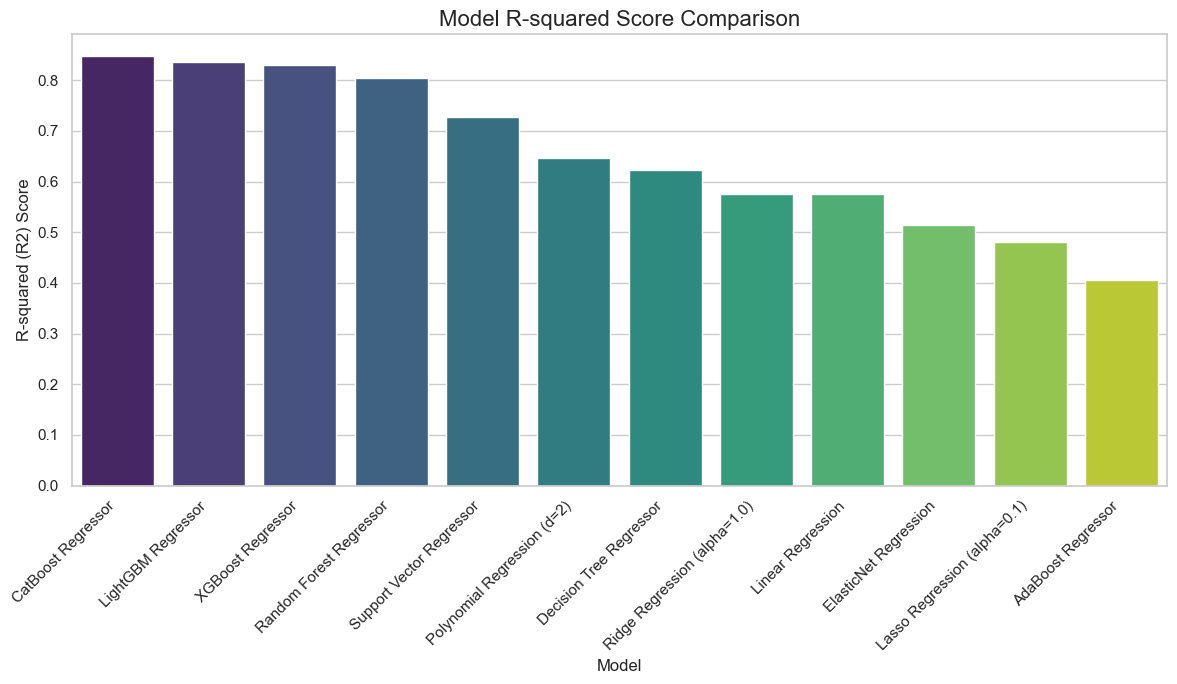

In [15]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Sort by R-squared in descending order
results_df.sort_values(by='R2', ascending=False, inplace=True)

print("--- Model Performance Comparison ---")
display(results_df)

# Create a bar chart for R-squared scores
plt.figure(figsize=(12, 7))
sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')
plt.title('Model R-squared Score Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared (R2) Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**📊 Linear Regression Assumption Check (Summary)**

A formal analysis of the `LinearRegression` model's diagnostic plots reveals whether we can trust its **coefficients** and **predictions**.

---

**⚠️ Homoscedasticity (Residuals vs. Predicted Values)**

- The plot of residuals versus predicted values shows a **distinct cone or fan shape**.
- The spread of the residuals **increases** as the predicted house value increases.
- This pattern indicates **heteroscedasticity**, which is a **violation** of a key linear regression assumption.

**🔍 Implication:**
- The model's prediction errors are **not consistent** across all price ranges.
- It is **less reliable** and has **higher error** when predicting **more expensive homes**.
- The **standard errors** of the coefficients are **biased**, making **hypothesis tests** and **confidence intervals** unreliable.

---
**✅ Normality of Residuals (Histogram)**

- The histogram of the residuals shows a distribution that is **roughly bell-shaped** and **symmetric** around zero.
- While not perfectly normal, it is a **reasonable approximation**.
- This assumption appears to be **mostly met**.

---

**🧾 Conclusion:**

- The **significant violation of the homoscedasticity assumption** is a major concern.
- While the linear model provides a **basic fit** (R² ≈ 0.57), its results and coefficients should be interpreted **with caution**.
- A **different model** that doesn't rely on this assumption (e.g., **tree-based models**) or a **transformation of the target variable** (e.g., `log(y)`) would likely yield more **appropriate and reliable** results.


C:\Users\HP\AppData\Local\Temp\ipykernel_2360\3094133413.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='mako')


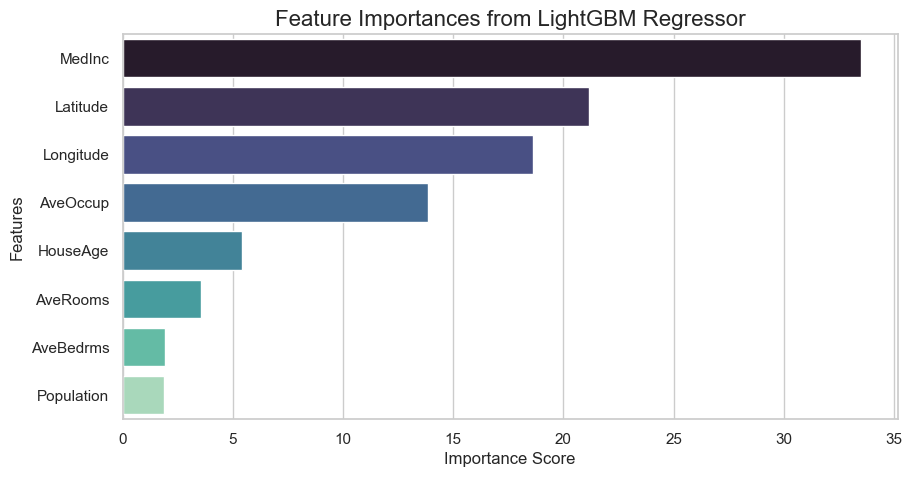

In [16]:
# The best model was LightGBM
best_model = cat_reg

# Extract feature importances
importances = pd.Series(best_model.feature_importances_, index=X.columns)

# Sort the importances
sorted_importances = importances.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='mako')
plt.title('Feature Importances from LightGBM Regressor', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

**🔍 Summary of Top Features**

**1. 🏦 MedInc (Median Income)**
- **Most dominant feature**.
- Reflects **purchasing power** in a neighborhood.
- Higher income areas support higher housing prices.
- Strongest predictor of a home's value.

---

**2. 📍 Location (Latitude & Longitude)**
- **Combined geographic location** of the property.
- Validates the real estate rule: _"location, location, location"_.
- Proximity to the **coast**, **major cities**, and **top schools** significantly boosts price.

---

**3. 👨‍👩‍👧 AveOccup (Average Occupancy)**
- Represents the **average number of people per household**.
- Acts as a **proxy for socio-economic conditions**.
- Lower occupancy might mean **smaller, wealthier households** in pricier areas.

---

**4. 🏠 HouseAge**
- The **age of the property** has a key influence.
- Can indicate:
  - Valuable, **established neighborhoods** (if older).
  - **Lower prices** due to aging structure or maintenance needs.
